In [4]:
import piplite
await piplite.install('seaborn')

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Импортируем все нужные модули

In [19]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv', delimiter=',')
data.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


Импортировали сам файл формата csv

In [18]:
pd.isnull(data).any

<bound method NDFrame._add_numeric_operations.<locals>.any of      anchor_ratio  trans_range  node_density  iterations    ale  sd_ale
0           False        False         False       False  False   False
1           False        False         False       False  False   False
2           False        False         False       False  False   False
3           False        False         False       False  False   False
4           False        False         False       False  False   False
..            ...          ...           ...         ...    ...     ...
102         False        False         False       False  False   False
103         False        False         False       False  False   False
104         False        False         False       False  False   False
105         False        False         False       False  False   False
106         False        False         False       False  False   False

[107 rows x 6 columns]>

Проверка на 0

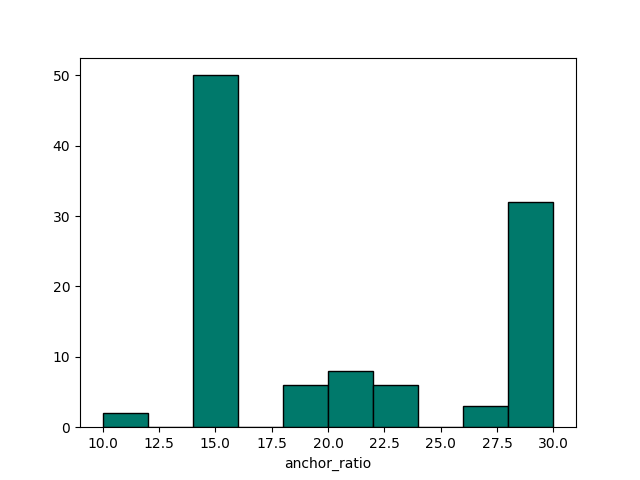

In [25]:
plt.figure()
plt.hist(data['anchor_ratio'], ec='black', color='#00796b')
plt.xlabel('anchor_ratio')
plt.ylabel('')
plt.show()

Гистограмма для anchor_ratio

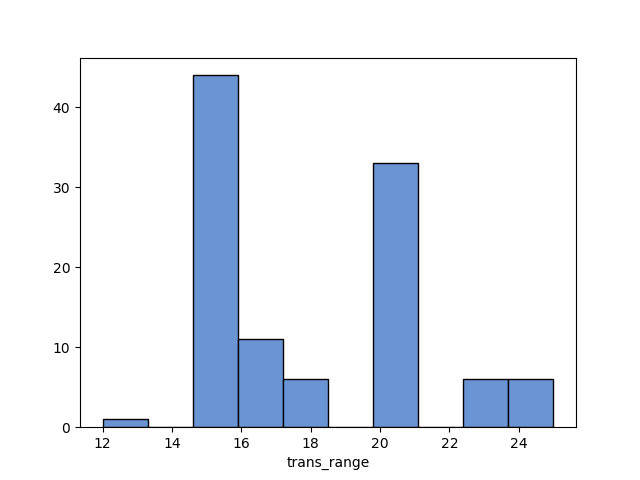

In [28]:
plt.figure()
plt.hist(data['trans_range'], ec='black', color='#6A94D3')
plt.xlabel('trans_range')
plt.ylabel('')
plt.show()

Гистограмма trans_range

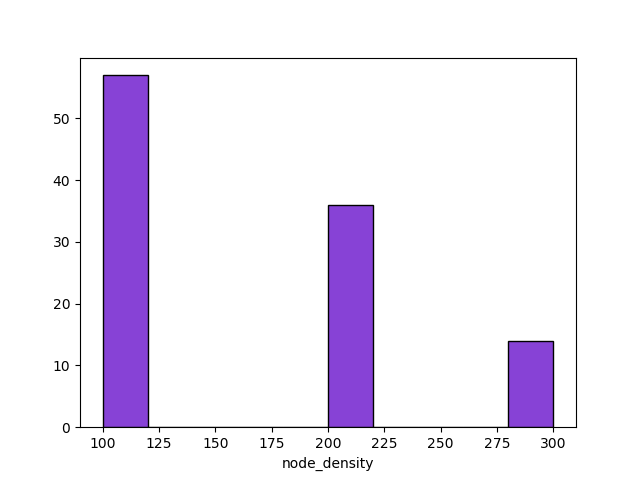

In [34]:
plt.figure()
plt.hist(data['node_density'], ec='black', color='#8742D6')
plt.xlabel('node_density')
plt.ylabel('')
plt.show()

Гистограма node_density

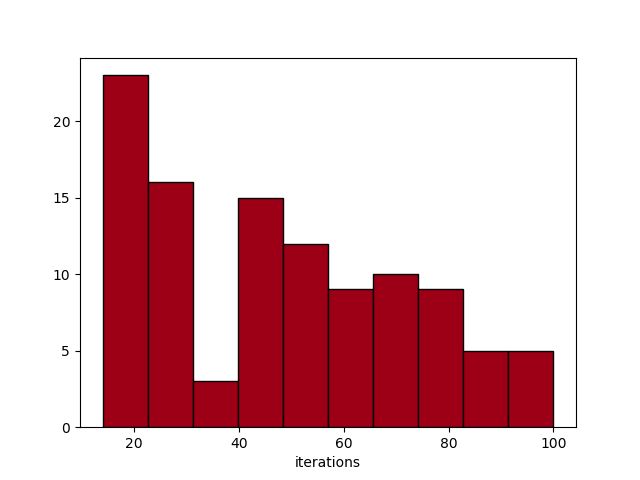

In [36]:
plt.figure()
plt.hist(data['iterations'], ec='black', color='#9D0016')
plt.xlabel('iterations')
plt.ylabel('')
plt.show()

Гистограма iterations

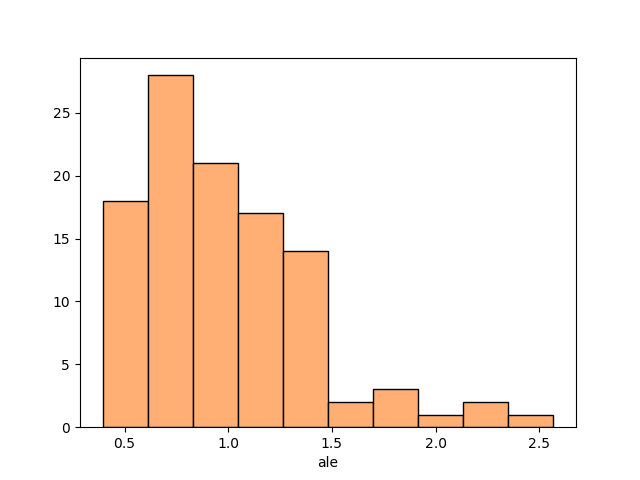

In [35]:
plt.figure()
plt.hist(data['ale'], ec='black', color='#FFAF73')
plt.xlabel('ale')
plt.ylabel('')
plt.show()

Гистограма ale

In [37]:
data.corr()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
anchor_ratio,1.000000,-0.094692,-0.116986,0.023167,-0.074997,-0.104657
trans_range,-0.094692,1.000000,-0.244055,-0.199315,0.109309,-0.076483
node_density,-0.116986,-0.244055,1.000000,-0.072426,-0.645927,-0.639097
iterations,0.023167,-0.199315,-0.072426,1.000000,-0.400394,-0.198966
ale,-0.074997,0.109309,-0.645927,-0.400394,1.000000,0.743958
sd_ale,-0.104657,-0.076483,-0.639097,-0.198966,0.743958,1.000000


Корреляция

In [39]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

Более удобный увид

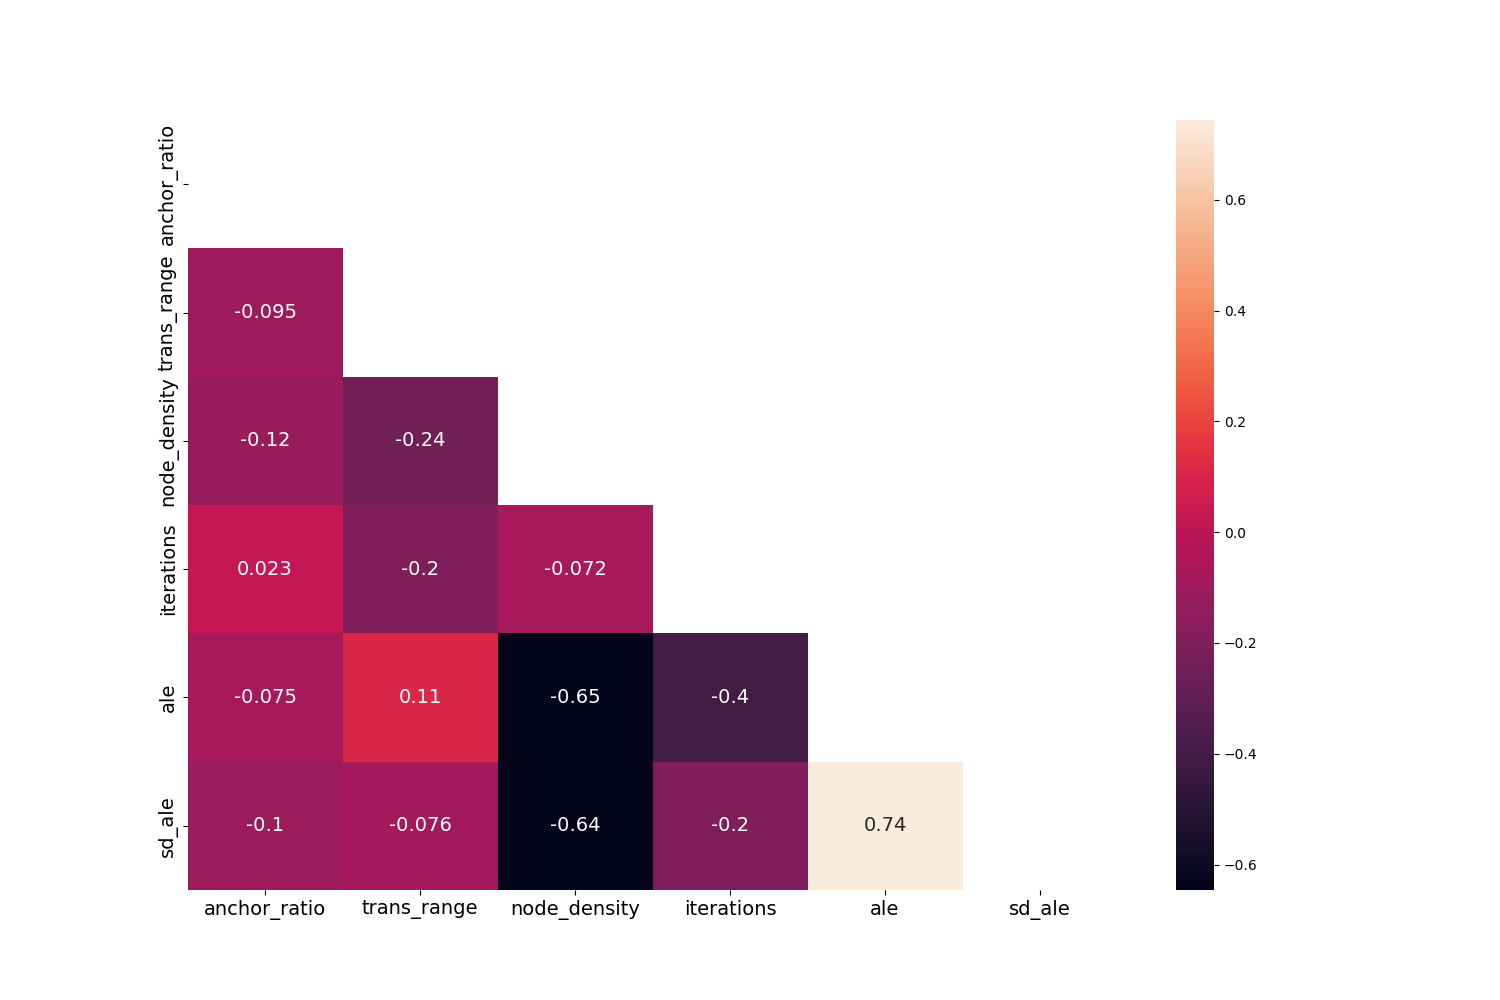

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Простыми словами корреляция – это взаимосвязь двух или нескольких случайных параметров. Когда одна величина растет или уменьшается, другая тоже изменяется.
Единственная хорошая корреляция, это коррлеяция ale - sd_ale.
В оатсальном корреляция слабая или плохая.

In [42]:
data.shape

(107, 6)

107 строк, 6 колонна

In [55]:
data

,anchor_ratio,trans_range,node_density,iterations,ale
0,30,15,200,40,0.773546
1,15,15,100,70,0.911941
2,30,15,100,50,0.814867
3,15,20,100,20,1.435332
4,30,15,100,40,1.265909
...,...,...,...,...,...
102,18,23,100,20,1.287472
103,14,17,200,60,0.899102
104,15,20,100,50,1.171140
105,20,20,100,40,1.234493


Дата без sd_ale

coef: [-0.00454369]
score 0.0056246135668754915


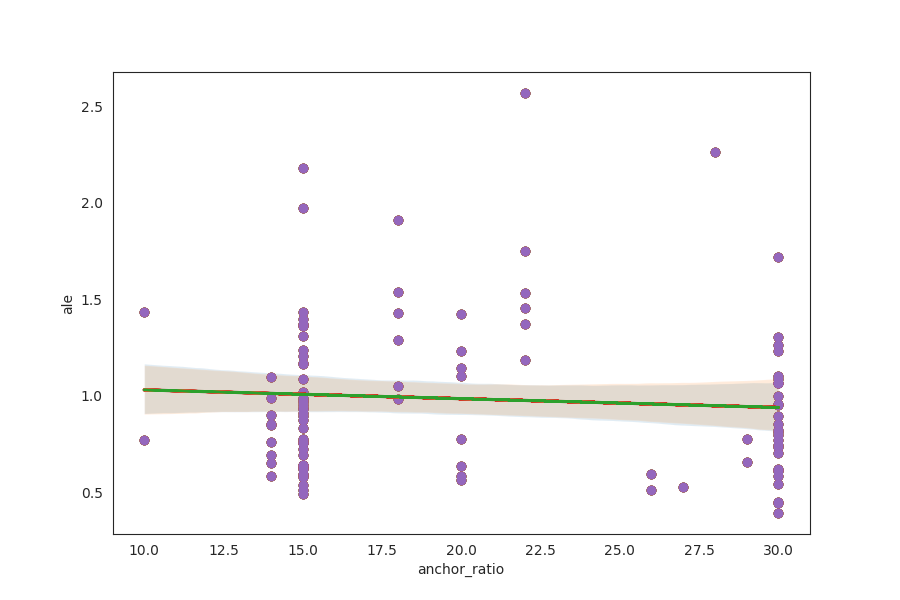

In [72]:
y = np.array(data['ale'])
x = np.array(data['anchor_ratio']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(data['anchor_ratio'], data['ale'])
plt.plot(x, model.predict(x))
plt.show()

Линейная регрессия для anchore_ratio на ale

coef: [0.01436397]
score 0.011948396959491459


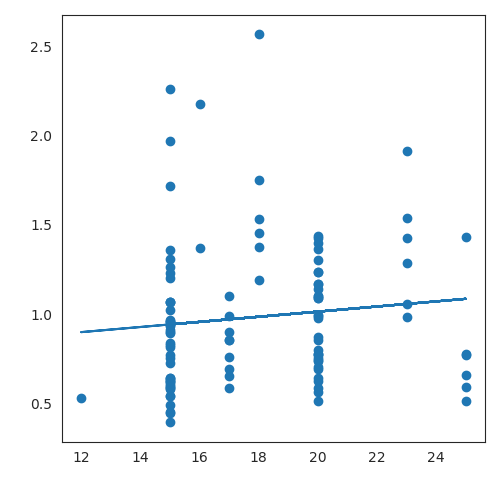

In [118]:
y = np.array(data['ale'])
x = np.array(data['trans_range']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(data['trans_range'], data['ale'])
plt.plot(x, model.predict(x))
plt.show()

Линейная регрессия для trans_range на ale

coef: [-0.00370479]
score 0.4172217579204366


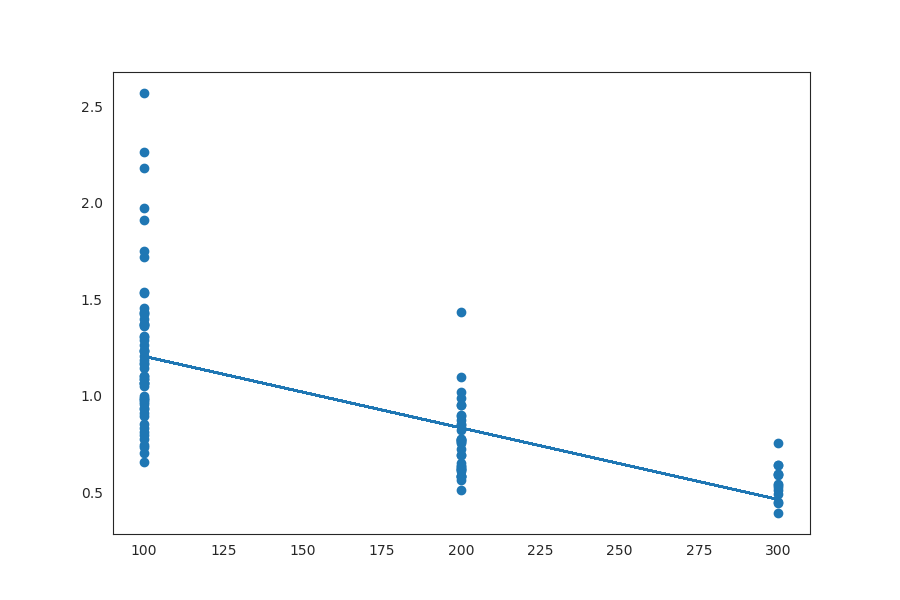

In [74]:
y = np.array(data['ale'])
x = np.array(data['node_density']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(data['node_density'], data['ale'])
plt.plot(x, model.predict(x))
plt.show()

Линейная регрессия для node_density на ale

coef: [-0.00662723]
score 0.16031556573386607


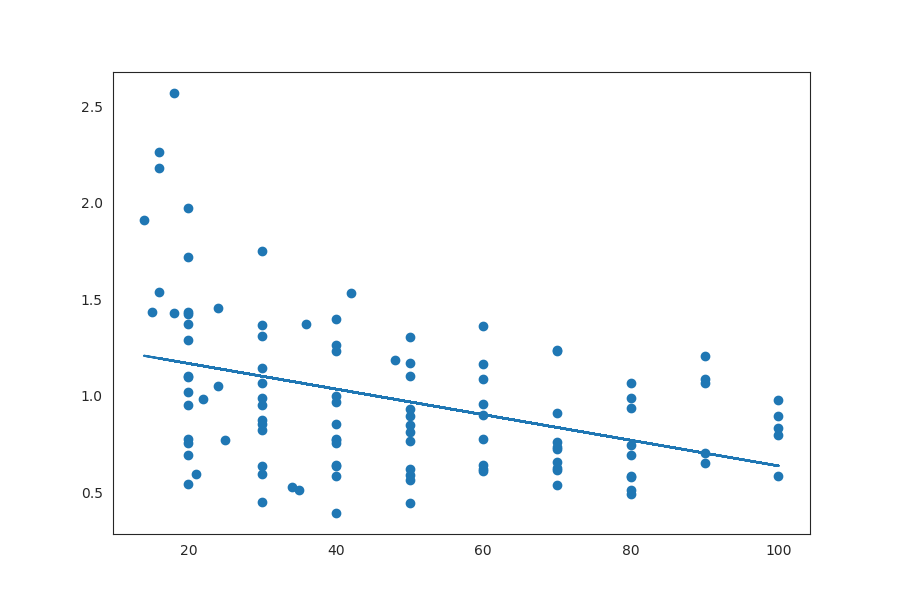

In [75]:
y = np.array(data['ale'])
x = np.array(data['iterations']).reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print('coef:', model.coef_)
print('score', model.score(x,y))
plt.scatter(data['iterations'], data['ale'])
plt.plot(x, model.predict(x))
plt.show()

Линейная регрессия для iterations на ale

In [99]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv', delimiter=',')

sd = data['sd_ale']
features = data.drop('sd_ale', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    sd, test_size=0.31, random_state=10)

Создание тестовой модели

In [100]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])
print('coef array:', regr.coef_)

Training data 0.6595503801976261
Test data r-squared:  0.6695708197857664
Intercept 0.6483410749674509
coef array: [-0.00399583 -0.01541645 -0.00116579 -0.00095847  0.20916586]


coef array - множественная регрессия
Intercept - интерцепт
Test data r-squared -  коэфициент детерменации для тестовой выборки
Training data - коэфициент детерменации для тренировочной выборки

In [89]:
data['sd_ale'].skew()

1.702619317440265

Начинаем повышение уровня точности

In [90]:
data['sd_ale'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      0.250555
1      0.498329
2      0.255546
3      0.394603
4      0.302943
         ...   
102    0.375227
103    0.231822
104    0.372001
105    0.599834
106    0.139791
Name: sd_ale, Length: 107, dtype: float64>

In [91]:
y_log = np.log(data['sd_ale'])
y_log.tail()

102   -0.980224
103   -1.461788
104   -0.988857
105   -0.511102
106   -1.967605
Name: sd_ale, dtype: float64

In [92]:
y_log.skew()

-1.4247068590581544

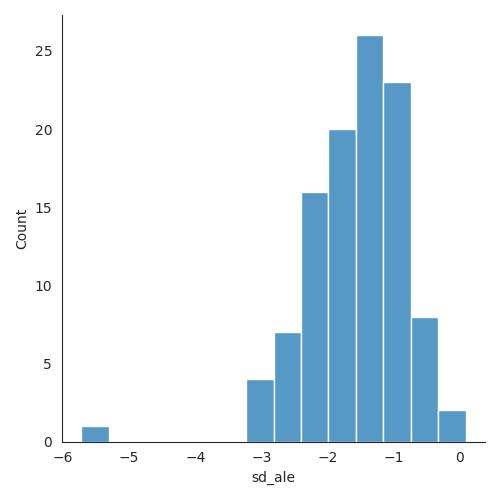

In [93]:
sns.displot(y_log)
plt.show()

In [107]:
sd = np.log(data['sd_ale'])
feautures = data.drop('sd_ale', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    sd, test_size=0.31, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.7761096853922365
Test data r-squared:  0.6302704944164663
Intercepr 2.0818860522239904


,coef
anchor_ratio,-0.025581
trans_range,-0.092210
node_density,-0.009387
iterations,-0.006430
ale,0.295217


coef array - множественная регрессия
Intercept - интерцепт
Test data r-squared -  коэфициент детерменации для тестовой выборки
Training data - коэфициент детерменации для тренировочной выборки
С повышенной точностью

In [108]:
data.describe()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,20.523364,17.878505,159.813084,47.887850,0.983471,0.265692
std,6.739556,3.107235,71.189109,24.668874,0.408313,0.183394
min,10.000000,12.000000,100.000000,14.000000,0.394029,0.003267
25%,15.000000,15.000000,100.000000,30.000000,0.655368,0.128437
50%,18.000000,17.000000,100.000000,40.000000,0.899102,0.242423
75%,30.000000,20.000000,200.000000,70.000000,1.196418,0.362762
max,30.000000,25.000000,300.000000,100.000000,2.568407,1.092220


Вывод основных статистических данных

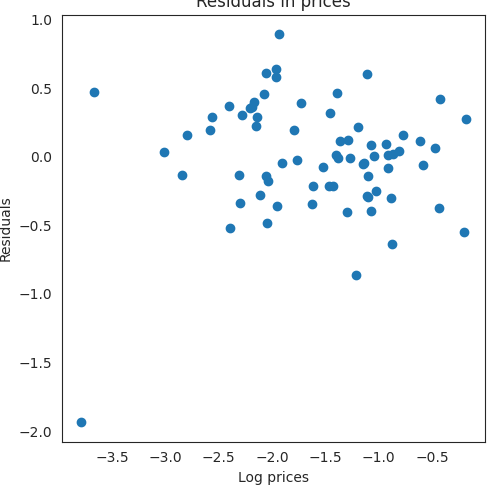

In [117]:
prices = np.log(data['sd_ale'])
feautures = data.drop('sd_ale', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices, test_size=0.33, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()
plt.scatter(x=results.fittedvalues, y=results.resid, alpha=1)
plt.xlabel('Log prices')
plt.ylabel('Residuals')
plt.title('Residuals in prices')
plt.show()

Визуализируем функцию потерь